# Ensemble

- 다양한 알고리즘으로 모델을 만들고 성능을 비교하기
- 모바일 이탈율 구하기

# 0. 라이브러리 불러오기 및 데이터 준비하기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = '../data/mobile_data.csv'
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE':1})

**데이터 설명**

- COLLEGE: 대학 졸업여부
- INCOME: 연수입
- OVERAGE: 월평균 초과사용 시간(분)
- LEFTOVER: 월평균 잔여시간비율(%)
- HOUSE: 집값
- HANDSET_PRICE: 스마트폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월평균 장기통화(15분이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화 시간
- REPORTED_SATISFACTION: 만족도 설문조사 결과
- REPORTED_USAGE_LEVEL: 사용도 자가진단 결과
- CONSIDERING_CHANGE_OF_PLAN: 향후 변경계획 설문조사 결과
- CHURN: 이탈(번호이동) 여부

# 1. 데이터 파악하기

In [3]:
# 데이터 살펴보기
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


In [4]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20000.0,10000.50000,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
COLLEGE,20000.0,0.50240,0.500007,0.0,0.00,1.0,1.00,1.0
INCOME,20000.0,80281.44775,41680.586319,20007.0,42217.00,75366.5,115881.75,159983.0
OVERAGE,20000.0,85.97955,85.992324,-2.0,0.00,59.0,179.00,335.0
LEFTOVER,20000.0,23.89865,26.816645,0.0,0.00,14.0,41.00,89.0
HOUSE,20000.0,493155.26425,252407.884692,150002.0,263714.25,452259.5,702378.00,999996.0
HANDSET_PRICE,20000.0,389.61510,213.820682,130.0,219.00,326.0,533.25,899.0
OVER_15MINS_CALLS_PER_MONTH,20000.0,8.00070,8.925418,0.0,1.00,4.0,15.00,29.0
AVERAGE_CALL_DURATION,20000.0,6.00225,4.402558,1.0,2.00,5.0,10.00,15.0
CHURN,20000.0,0.49260,0.499958,0.0,0.00,0.0,1.00,1.0


# 2. 데이터 전처리

**1) 변수 제거**

In [5]:
# 제거 대상: id
drop_cols = ['id']

# 변수 제거
data.drop(columns=drop_cols, axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


**2) x, y 분리**

In [6]:
# target 값 확인
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:,target]

**3) 가변수화**

In [7]:
# 가변수 대상
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,0,31953,0,6,313378,161,0,4,0,1,0,0,0,1,0,0,0,0,1,0
1,1,36147,0,13,800586,244,0,6,0,1,0,0,0,1,0,0,1,0,0,0
2,1,27273,230,0,305049,201,16,15,0,1,0,0,0,0,0,1,0,0,0,1
3,0,120070,38,33,788235,780,3,2,0,1,0,0,0,0,1,0,1,0,0,0
4,1,29215,208,85,224784,241,21,1,0,0,0,1,0,1,0,0,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

**5) 정규화**

In [9]:
# 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler =MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 3. 성능예측

In [10]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

**0) 결과 저징할 리스트 생성**

In [11]:
result =dict()

**1) KNN**

In [12]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [13]:
# 학습하기
model.fit(x_train_s, y_train)

KNeighborsClassifier()

In [14]:
# 예측하기
y_pred = model.predict(x_test_s)

In [15]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1878 1187]
 [1168 1767]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      3065
           1       0.60      0.60      0.60      2935

    accuracy                           0.61      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.61      0.61      0.61      6000



In [16]:
# 성능 평가 수집
cv_score = cross_val_score(model,
                           x_train_s, 
                           y_train, cv=10)
result['KNN'] = cv_score.mean()

**2) Decision Tree**

In [17]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [18]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [19]:
# 예측하기
y_pred = model.predict(x_test)

In [20]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2112  953]
 [ 858 2077]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3065
           1       0.69      0.71      0.70      2935

    accuracy                           0.70      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.70      0.70      0.70      6000



In [21]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['DecisionTree'] = cv_score.mean()

**3) Logistic Regression**

In [22]:
# 선언하기
model = LogisticRegression()

In [23]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
# 예측하기
y_pred = model.predict(x_test)

In [25]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1961 1104]
 [1140 1795]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      3065
           1       0.62      0.61      0.62      2935

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000



In [26]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['LogisticRegression'] = cv_score.mean()

**4) Random Forest**

In [27]:
# 선언하기
model = RandomForestClassifier(max_depth=5,random_state=1)

In [28]:
# 학습하기
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [29]:
# 예측하기
y_pred = model.predict(x_test)

print(y_pred[:5])
print(y_test[:5].values)

[1 1 1 1 1]
[1 0 1 1 0]


In [30]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2262  803]
 [1027 1908]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      3065
           1       0.70      0.65      0.68      2935

    accuracy                           0.69      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.70      0.69      0.69      6000



['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little', 'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little', 'CONSIDERING_CHANGE_OF_PLAN_considering', 'CONSIDERING_CHANGE_OF_PLAN_never_thought', 'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps']
[0.00262107 0.10339629 0.23429366 0.05885828 0.33934795 0.06421035
 0.14911255 0.03525314 0.00096288 0.0015755  0.00093859 0.0006538
 0.00126489 0.0013026  0.00111885 0.00096863 0.00112295 0.00087974
 0.00142356 0.00069473]


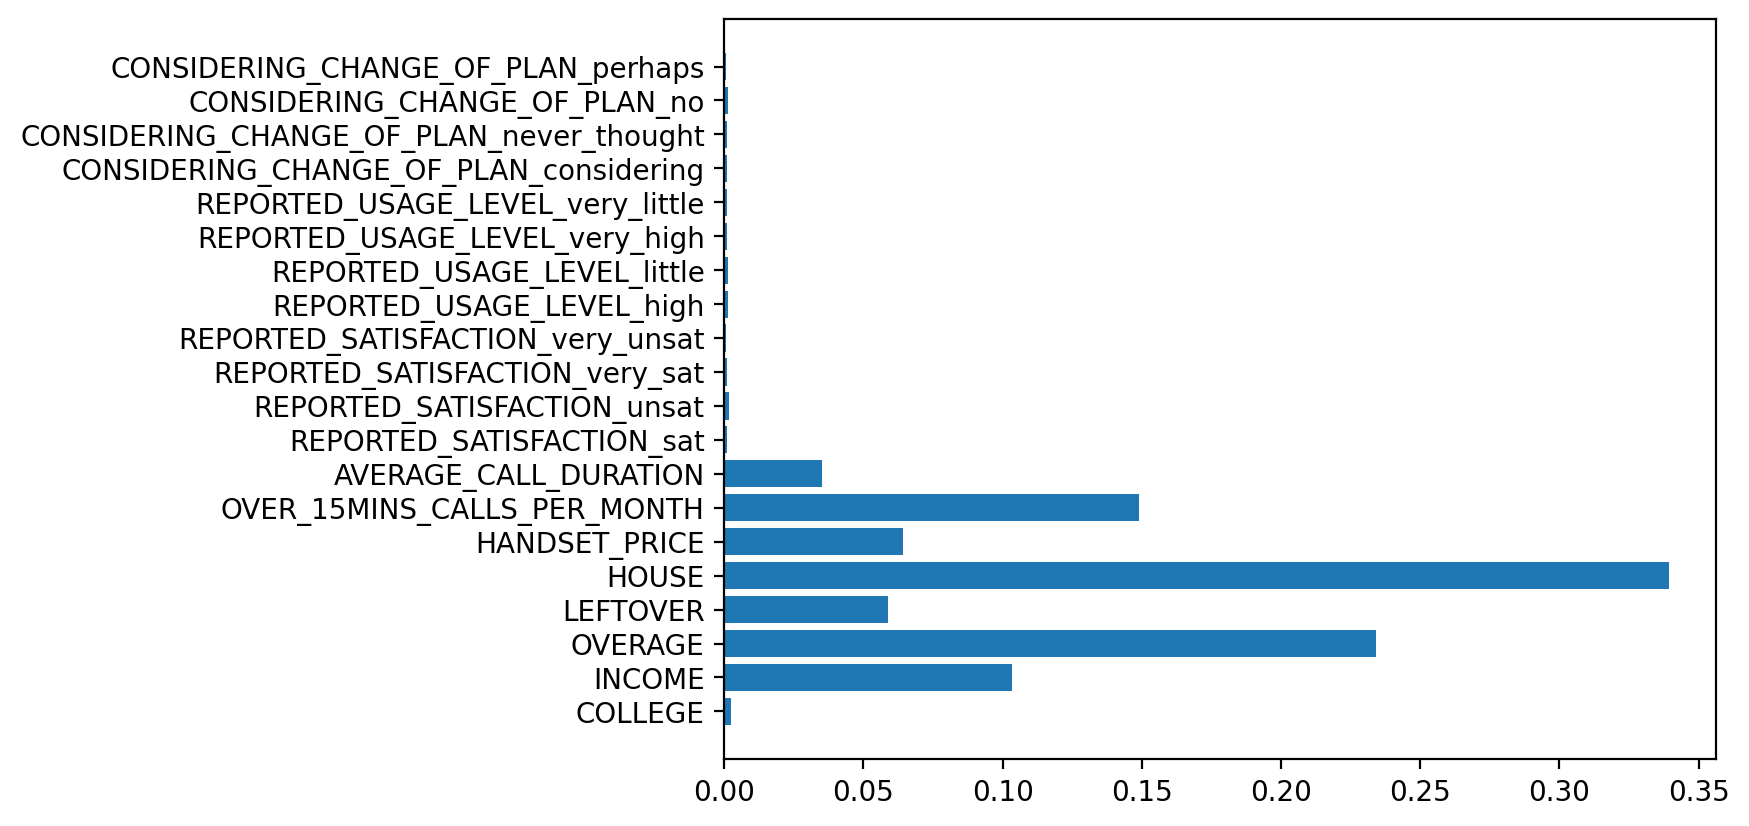

In [31]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

In [32]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['RandomForest'] = cv_score.mean()

**5) XGBoost**

In [33]:
# 선언하기
model = XGBClassifier(max_depth=5,random_state=1)

In [34]:
# 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [35]:
# 예측하기
y_pred = model.predict(x_test)

In [36]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2009 1056]
 [ 802 2133]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      3065
           1       0.67      0.73      0.70      2935

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000



['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little', 'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little', 'CONSIDERING_CHANGE_OF_PLAN_considering', 'CONSIDERING_CHANGE_OF_PLAN_never_thought', 'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps']
[0.04713875 0.07329477 0.15828755 0.08741537 0.08398339 0.03851487
 0.03722638 0.03488651 0.05525862 0.03292976 0.03379658 0.02887707
 0.0377002  0.03423537 0.03110396 0.03929682 0.03526017 0.03453726
 0.03640848 0.03984809]


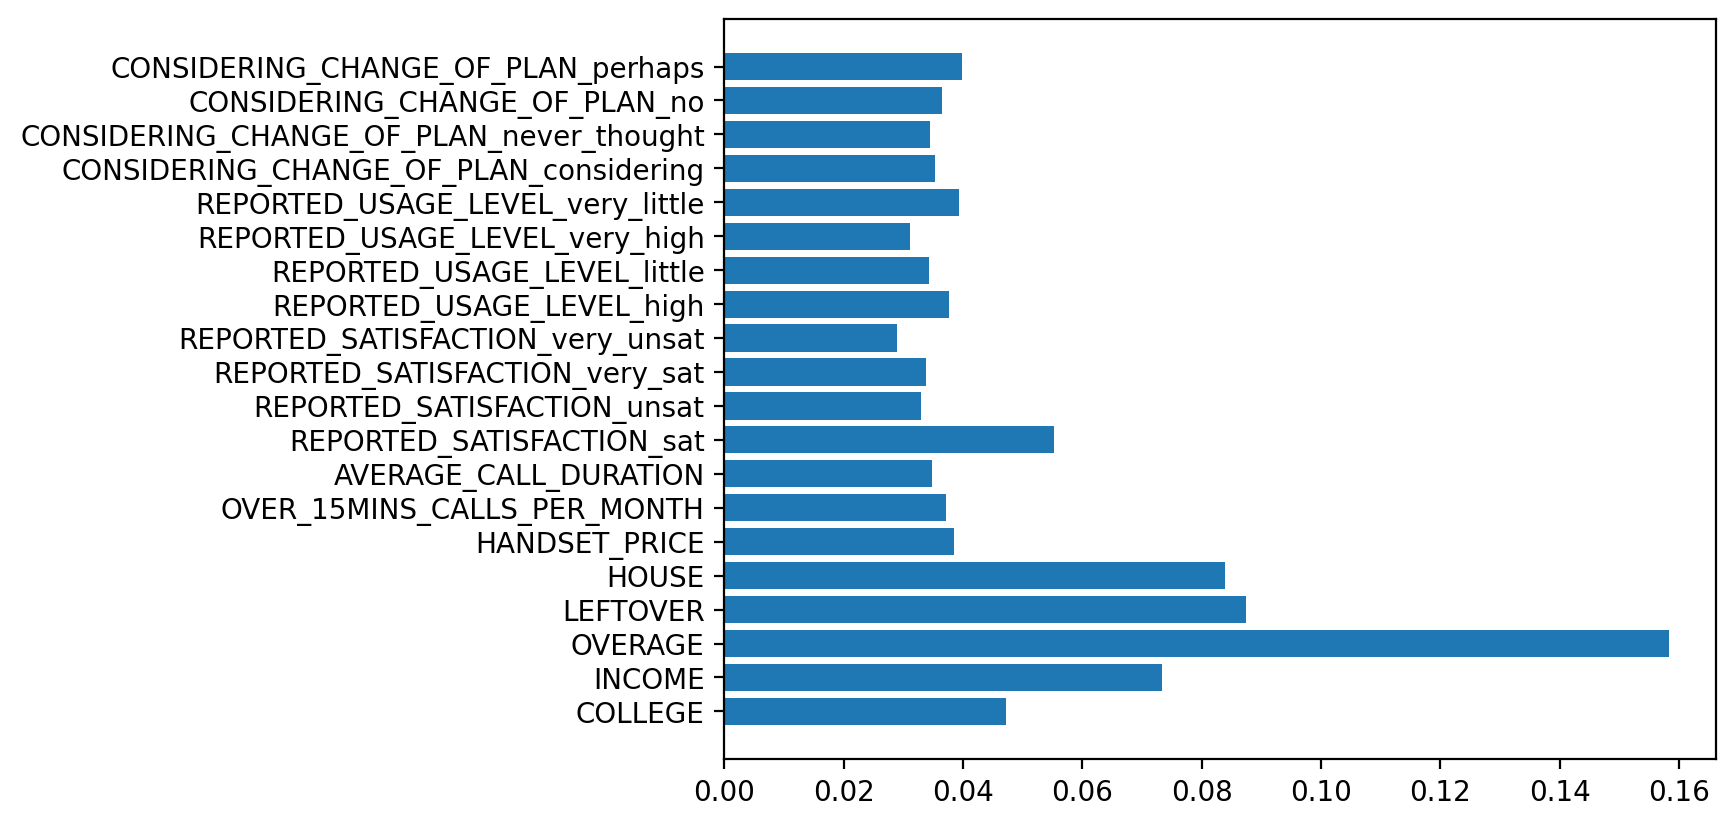

In [37]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

In [38]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['XGBoost'] = cv_score.mean()

**6) LightGBM**

In [39]:
# 선언하기
model = LGBMClassifier(random_state=1, verbose=-100)

In [40]:
# 학습하기
model.fit(x_train, y_train)

LGBMClassifier(random_state=1, verbose=-100)

In [41]:
# 예측하기
y_pred = model.predict(x_test)

In [42]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1940 1125]
 [ 721 2214]]
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      3065
           1       0.66      0.75      0.71      2935

    accuracy                           0.69      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.70      0.69      0.69      6000



['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little', 'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little', 'CONSIDERING_CHANGE_OF_PLAN_considering', 'CONSIDERING_CHANGE_OF_PLAN_never_thought', 'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps']
[ 83 527 416 315 534 480 193 138  14  26  31  46  11  49  29  25  41  13
  19  10]


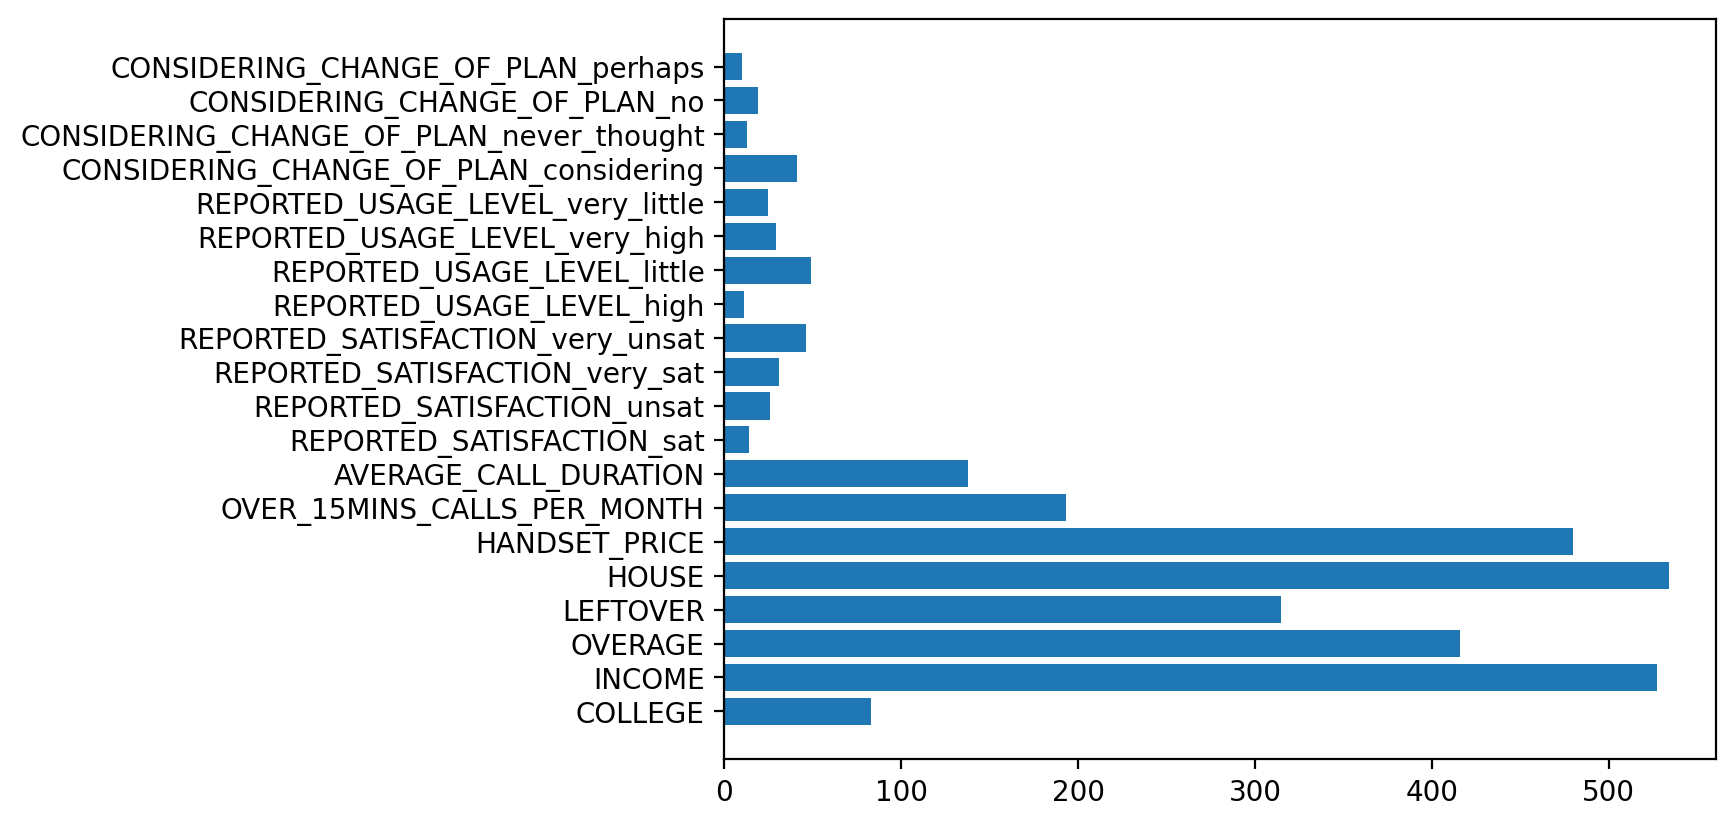

In [43]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

In [44]:
cv_score = cross_val_score(model,
                          x_train, 
                           y_train, 
                           cv=10)
result['LGMBClass'] = cv_score.mean()

# 4. 성능 결과 확인하기

In [45]:
result

{'KNN': 0.5972857142857143,
 'DecisionTree': 0.6977857142857143,
 'LogisticRegression': 0.6342142857142857,
 'RandomForest': 0.6964285714285714,
 'XGBoost': 0.6879285714285716,
 'LGMBClass': 0.7002142857142857}

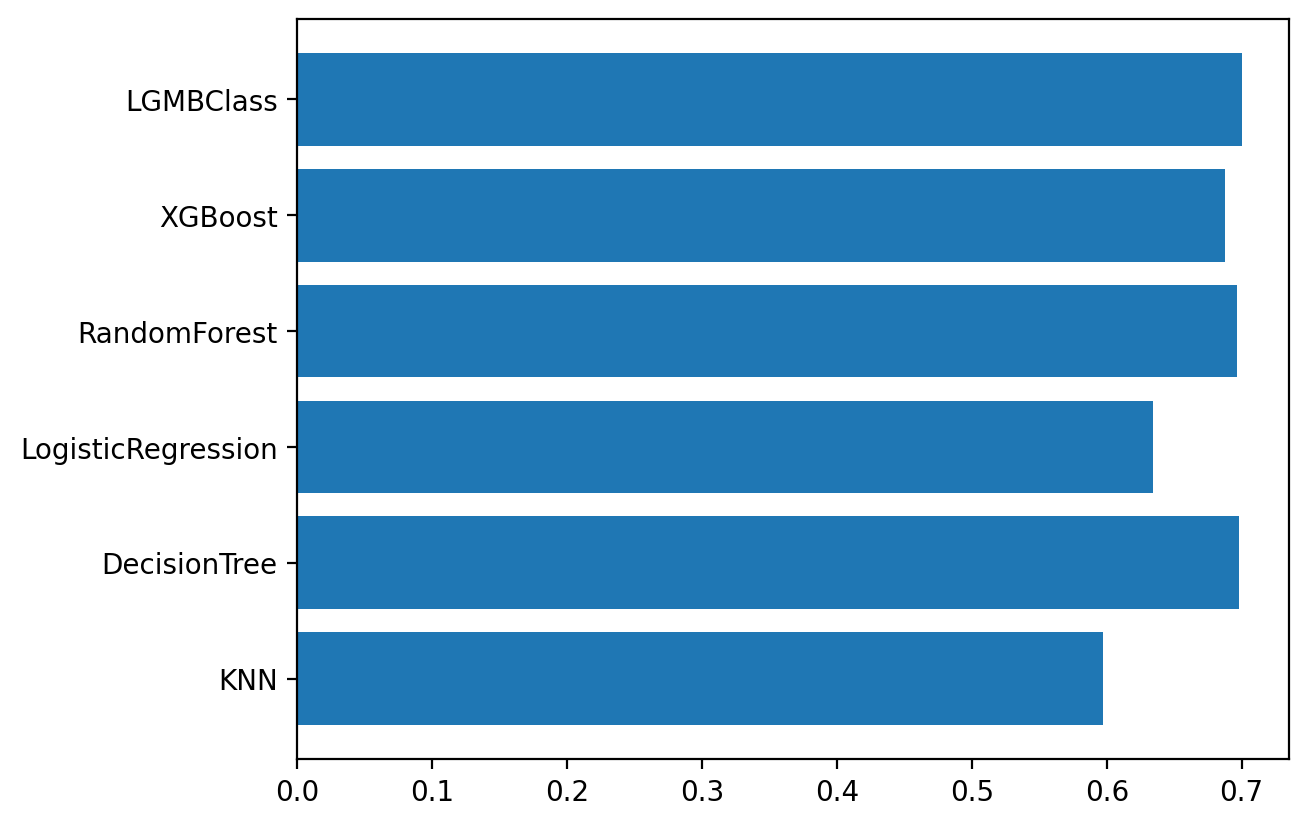

In [46]:
plt.barh(list(result.keys()), result.values())
plt.show()

# 5. 성능 튜닝
- 위 4번의 성능 결과에서 가장 좋을 것으로 예측된 모델을 튜닝한다.

In [47]:
# 모델 선언
model_LGBMC = LGBMClassifier(random_state=1, verbose=-100)

In [48]:
# 파라미터 지정
param = {'max_depth':range(1,101)}

In [49]:
# 모델 선언
final_model = GridSearchCV(model_LGBMC,
                          param,
                          cv=5,)

In [50]:
# 학습하기
final_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=1, verbose=-100),
             param_grid={'max_depth': range(1, 101)})

In [51]:
# 성능 검증하기
print(final_model.best_params_) # 최고의 파라미터
print(final_model.best_score_) # 최고 점수

{'max_depth': 6}
0.6980000000000001


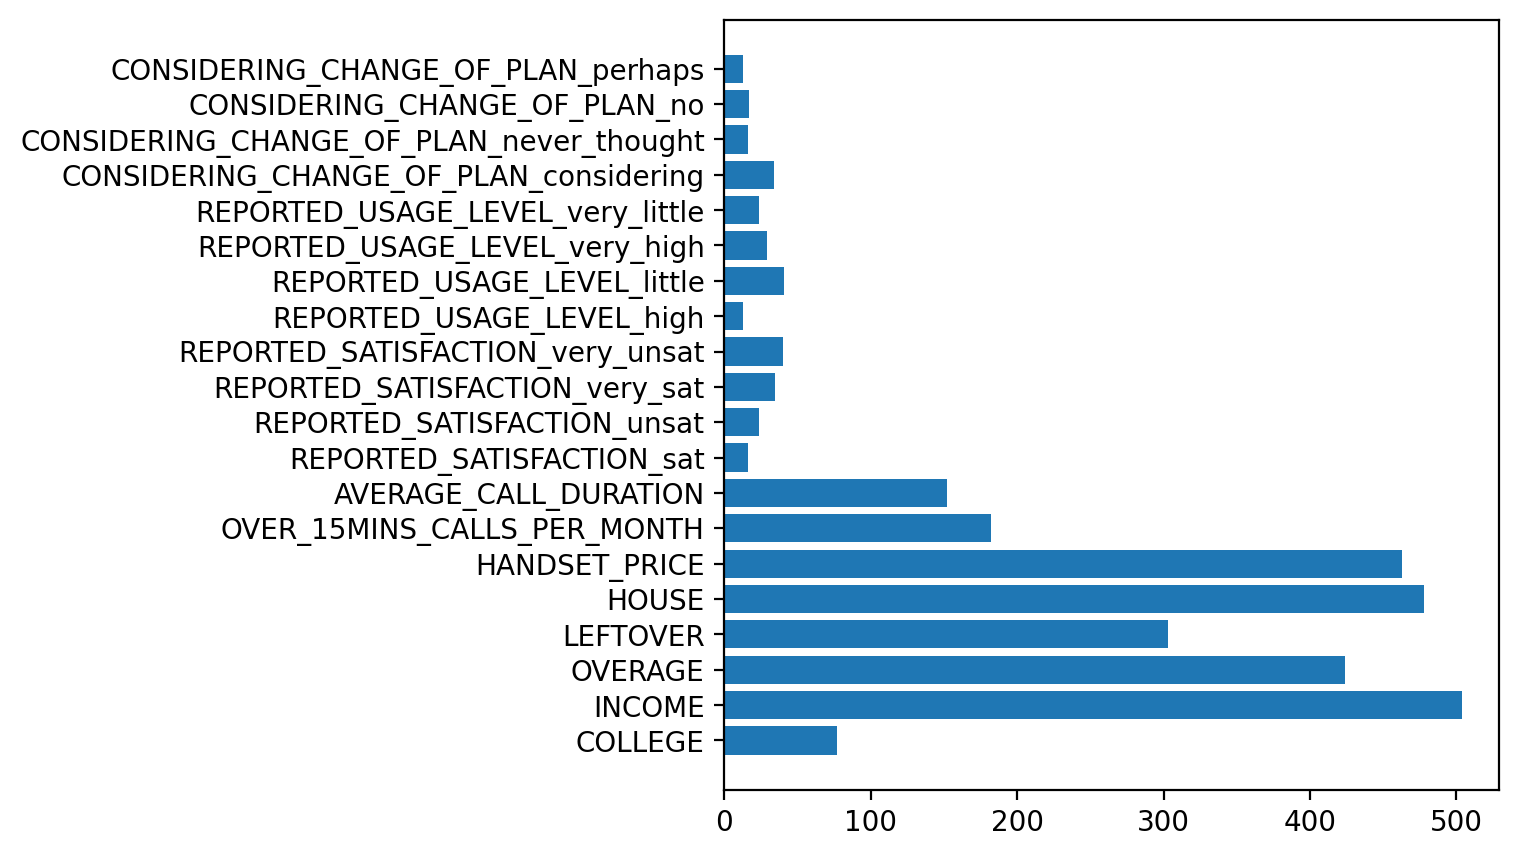

In [52]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=final_model.best_estimator_.feature_importances_)
plt.show()

# 6. 성능 평가

In [53]:
# 예측하기
final_y_pred = final_model.predict(x_test)
final_y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [54]:
# 성능평가
print(confusion_matrix(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))

[[1953 1112]
 [ 747 2188]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3065
           1       0.66      0.75      0.70      2935

    accuracy                           0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000

